In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV

## Data Exploration

In [3]:
# load dataset
df = pd.read_csv("kc_house_data.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
# dataset inforation
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# shape of the dataframe
df.shape

(21613, 21)

In [6]:
# checking missing values
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [7]:
# stats of dataframe
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [8]:
# checking number of unique values in each columns
df.nunique()

id               21436
date               372
price             4028
bedrooms            13
bathrooms           30
sqft_living       1038
sqft_lot          9782
floors               6
waterfront           2
view                 5
condition            5
grade               12
sqft_above         946
sqft_basement      306
yr_built           116
yr_renovated        70
zipcode             70
lat               5034
long               752
sqft_living15      777
sqft_lot15        8689
dtype: int64

In [9]:
# checking duplicate values in dataset
df.duplicated().sum()

0

In [10]:
# checking categotical data and numerical data
cat_data = df.select_dtypes(include=['object'])
num_data = df.select_dtypes(exclude=['object'])

print(f'Categorical Features: {cat_data.shape[1]} features')
print(f'Numerical Features: {num_data.shape[1]} features')

Categorical Features: 1 features
Numerical Features: 20 features


### Conclusion: Data Exploration

- Dataset contain 21613 records (no duplicate) and 21 features (columns).
- No null values present in dataset.
- Columns ['sqft_living','sqft_above','sqft_basement','yr_renovated','sqft_living15'] has too large standard deviation.
- Most of the columns contain unique values in it.
- Their are 20 numerical features and only 1 categorical feature.

## Exploratory Data Analysis (EDA / Data Visualization)

Text(0.5, 1.0, 'Distribution of the Price Feature (Target Variable)')

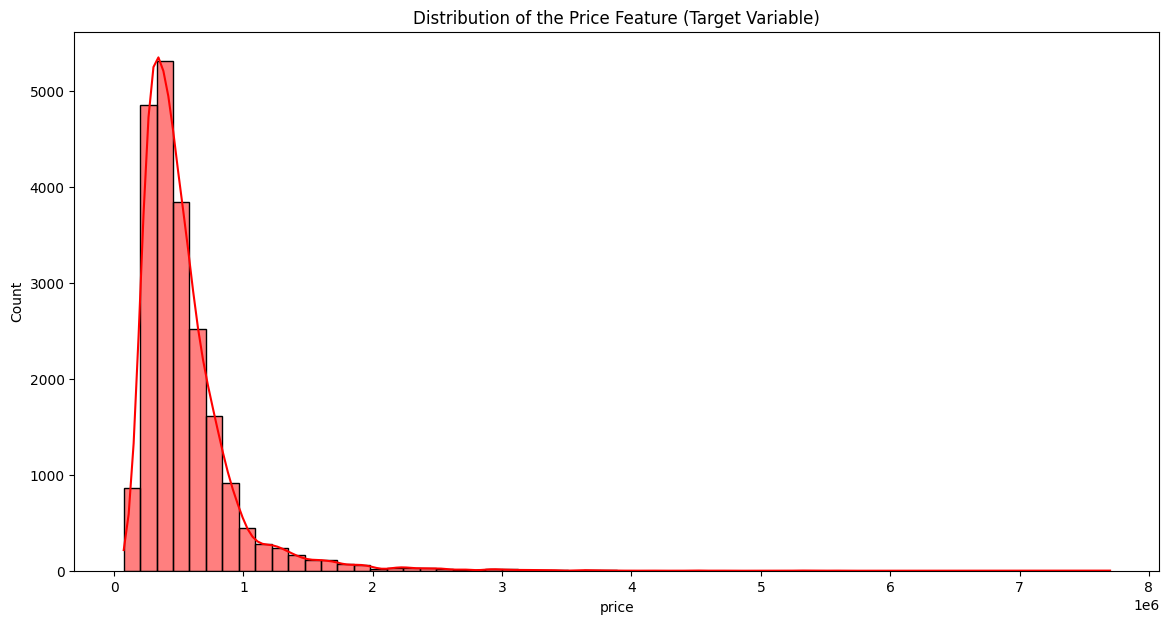

In [11]:
# distribution of price (target variable) feature
plt.figure(figsize=(14,7))
sns.histplot(data=df, x='price', color='r', bins=60, kde=True)
plt.title("Distribution of the Price Feature (Target Variable)")

Note: '1e6' represent the value of 1000000 (1 Million). And, price of the houses are in dollars.

In [12]:
# top 5 most expensive houses
df.nlargest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000.0,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500.0,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000.0,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000.0,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000.0,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750


In [13]:
# top 5 cheapest houses
df.nsmallest(5, 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000.0,1,0.00,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,20140506T000000,78000.0,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,20140523T000000,80000.0,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,20150324T000000,81000.0,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,20141105T000000,82000.0,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250


Text(0.5, 1.0, 'Distribution of the Bedrooms Feature')

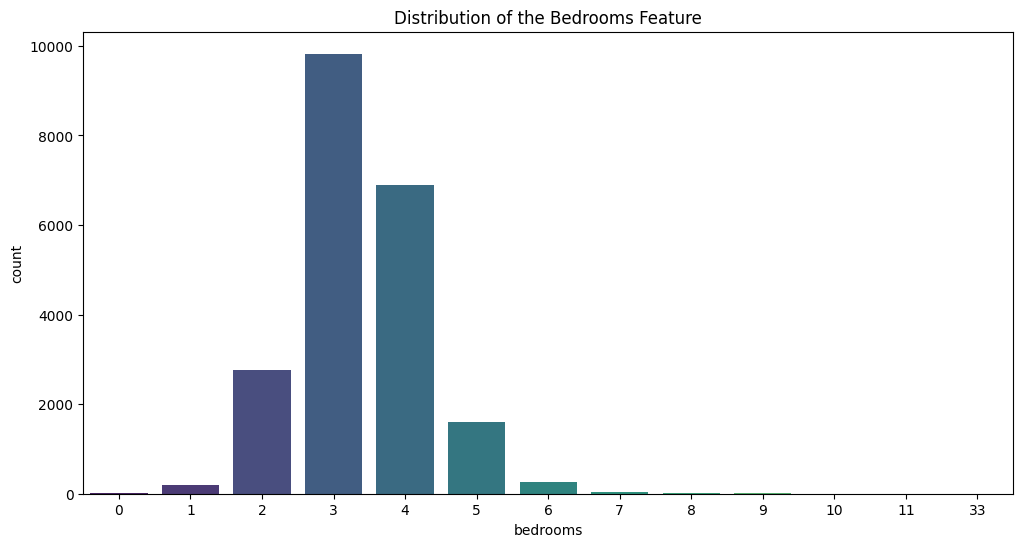

In [14]:
# distribution of the number of bedrooms
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='bedrooms', palette='viridis')
plt.title("Distribution of the Bedrooms Feature")

Conclusion: Most of the houses have bedrooms between range 2 to 4 (including).

Text(0.5, 1.0, 'Distribution of the Bathrooms Feature')

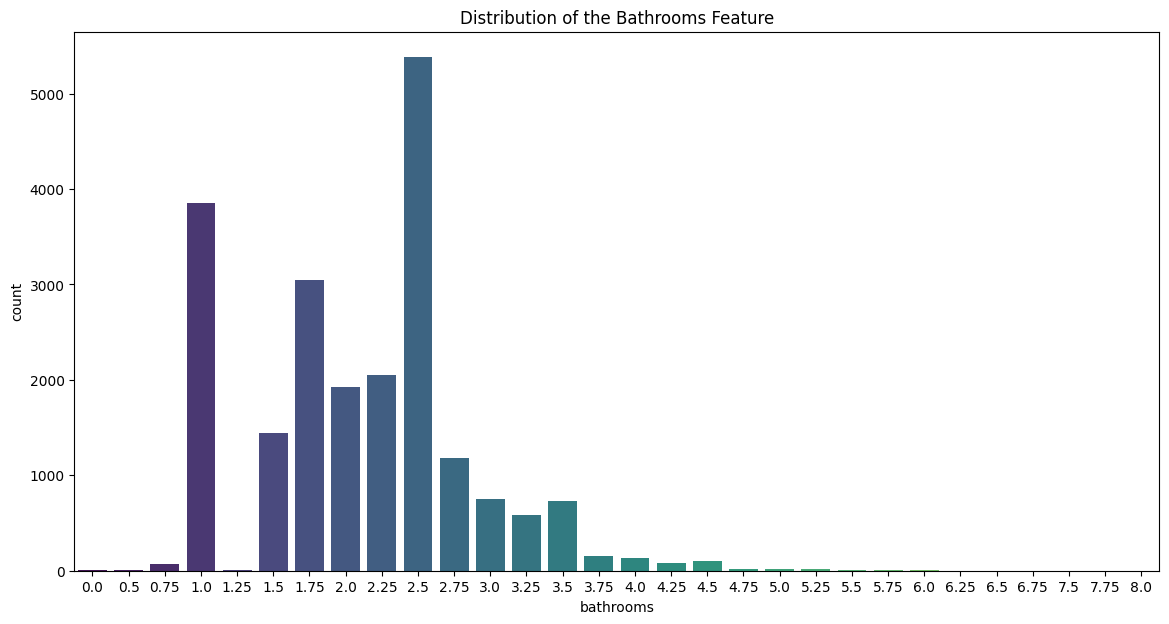

In [15]:
# distribution of the number of bathrooms
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='bathrooms', palette='viridis')
plt.title("Distribution of the Bathrooms Feature")

Conclusion: Bathroom feature is in float type. It must be in integer. Because, it is obvious that house has bathroom in int quantity not in float or decimal. We need to do feature engineering for that.

Text(0.5, 1.0, 'Distribution of the Floors Feature')

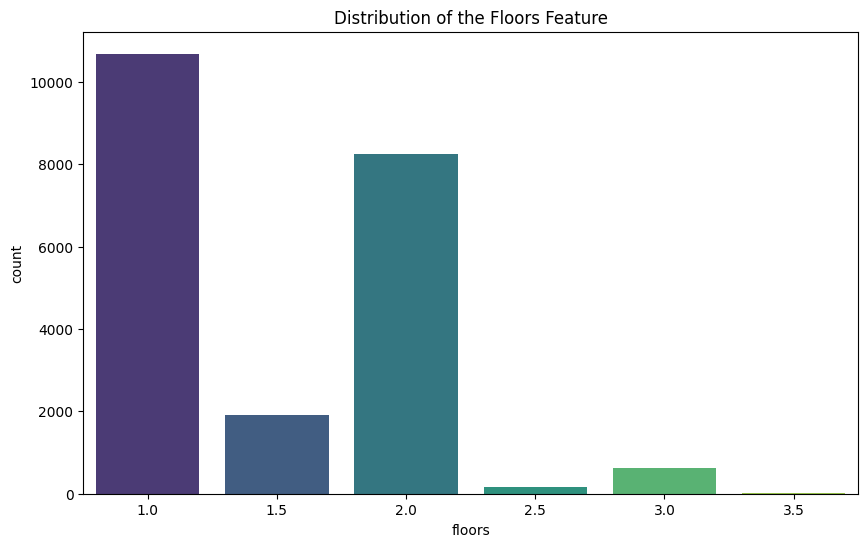

In [16]:
# distribution of the number of floors
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='floors', palette='viridis')
plt.title("Distribution of the Floors Feature")

Conclusion: Most of the houses have 1 or 2 floors.

Text(0.5, 1.0, 'Distribution of "Square Foot of Lot"')

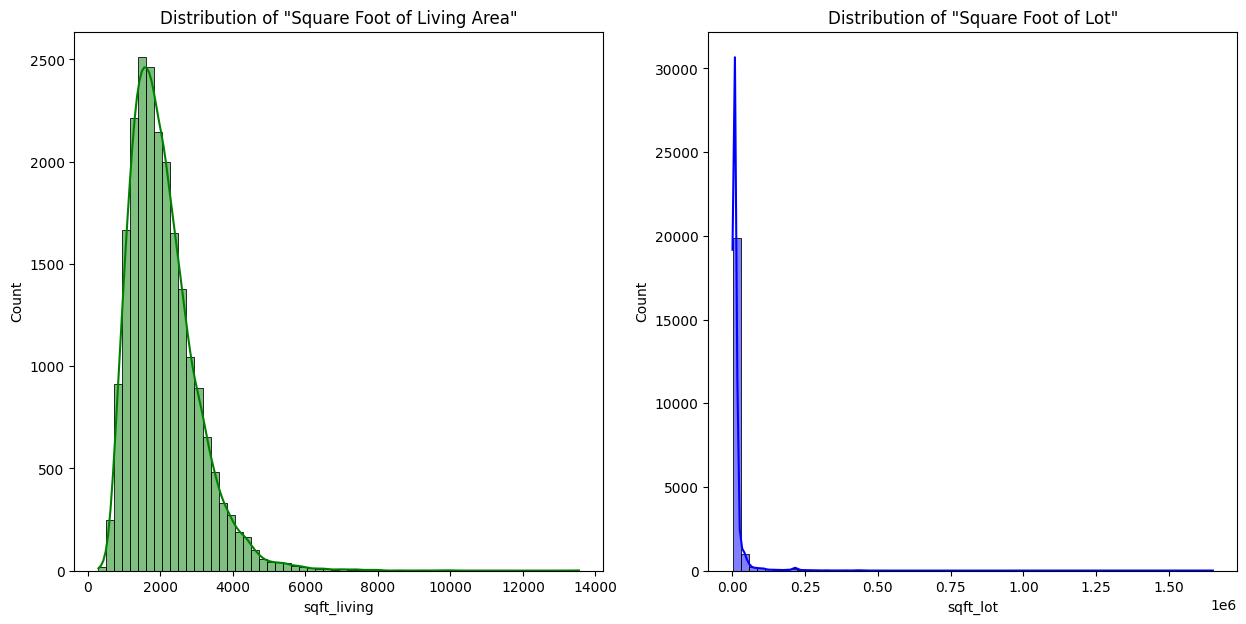

In [17]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='sqft_living',bins=60,kde=True,color='g')
plt.title('Distribution of "Square Foot of Living Area"')
plt.subplot(122)
sns.histplot(data=df,x='sqft_lot',bins=60,kde=True,color='b')
plt.title('Distribution of "Square Foot of Lot"')

Text(0.5, 1.0, 'Distribution of "Square footage of the basement"')

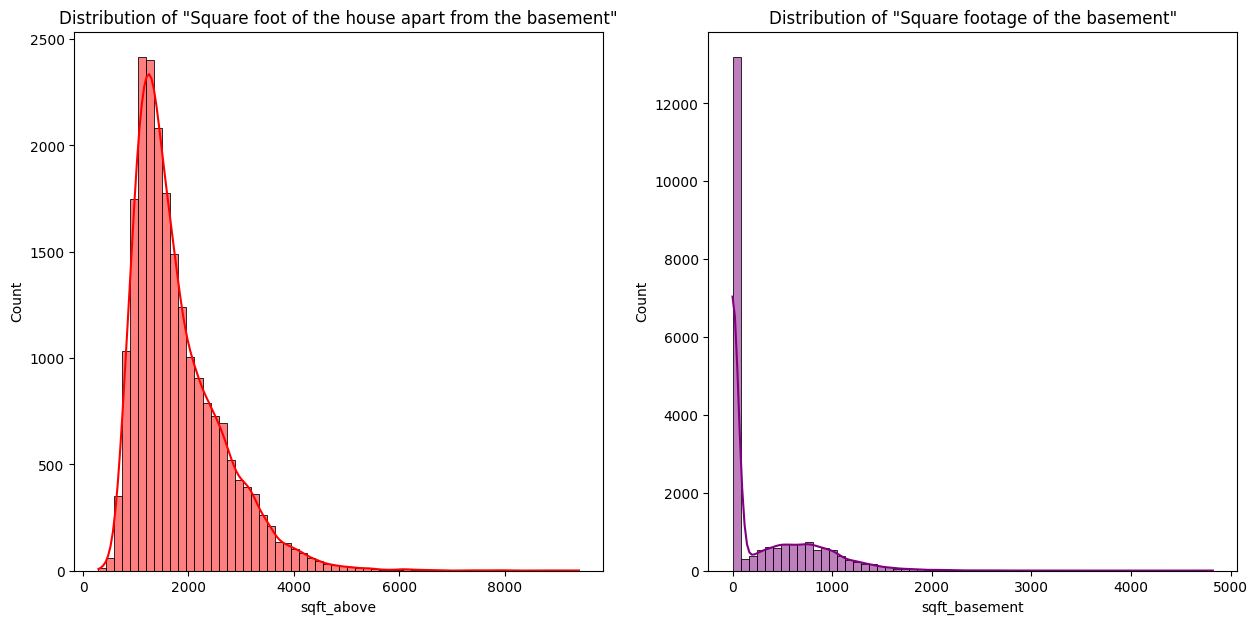

In [18]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='sqft_above',bins=60,kde=True,color='r')
plt.title('Distribution of "Square foot of the house apart from the basement"')
plt.subplot(122)
sns.histplot(data=df,x='sqft_basement',bins=60,kde=True,color='purple')
plt.title('Distribution of "Square footage of the basement"')

Text(0.5, 1.0, 'Distribution of sqft_lot15')

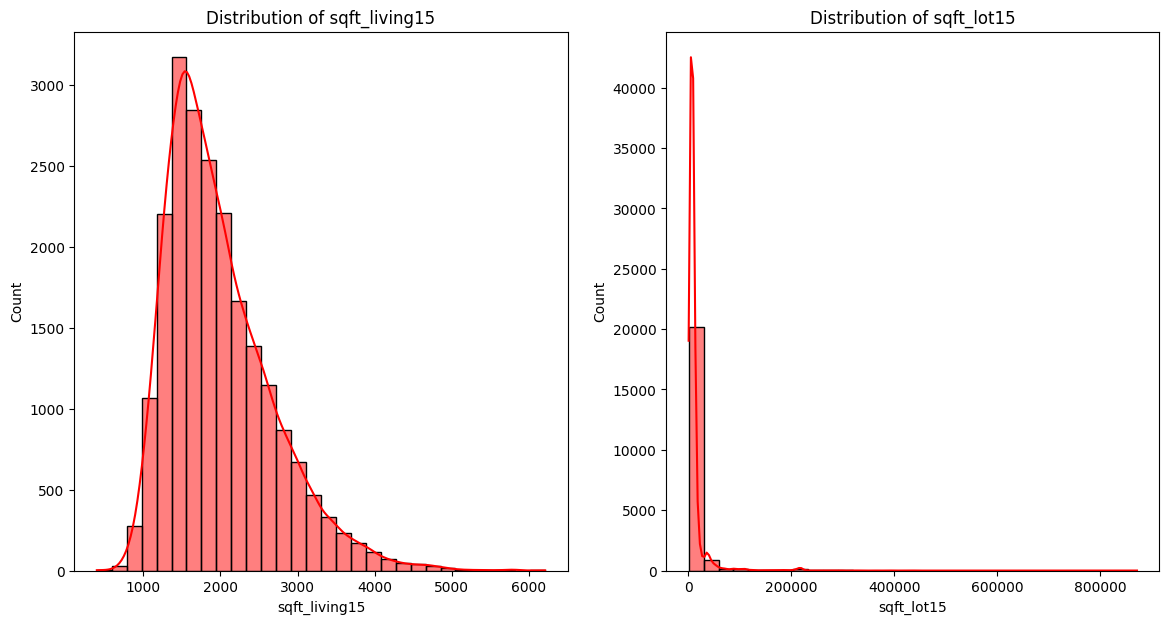

In [19]:
# distribution for features "sqft_living15" and "sqft_lot15"
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.histplot(df,x='sqft_living15', kde=True, color='r', bins=30)
plt.title('Distribution of sqft_living15')
plt.subplot(1,2,2)
sns.histplot(df,x='sqft_lot15', kde=True, color='r', bins=30)
plt.title('Distribution of sqft_lot15')

About Features: The features sqft_living15 and sqft_lot15 are defined as follows:

sqft_living15: The living space area (in square feet) of the nearest 15 neighbors.
sqft_lot15: The lot size (in square feet) of the nearest 15 neighbors.

These features provide information about the average size of neighboring homes and lots, which can be useful for understanding the property's context within its neighborhood and how it compares to nearby properties.

Text(0.5, 1.0, 'Number of houses with waterfront')

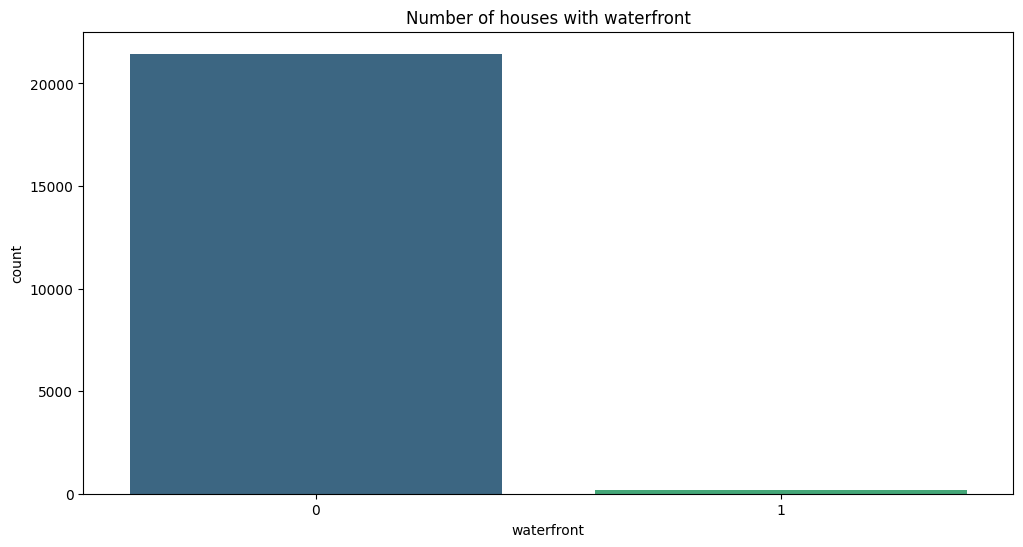

In [20]:
# countplot for the number of houses with waterfront
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='waterfront', palette='viridis')
plt.title('Number of houses with waterfront')

Conclusion: Most of the houses don't have waterfront.

Text(0.5, 1.0, 'Number of houses with condition')

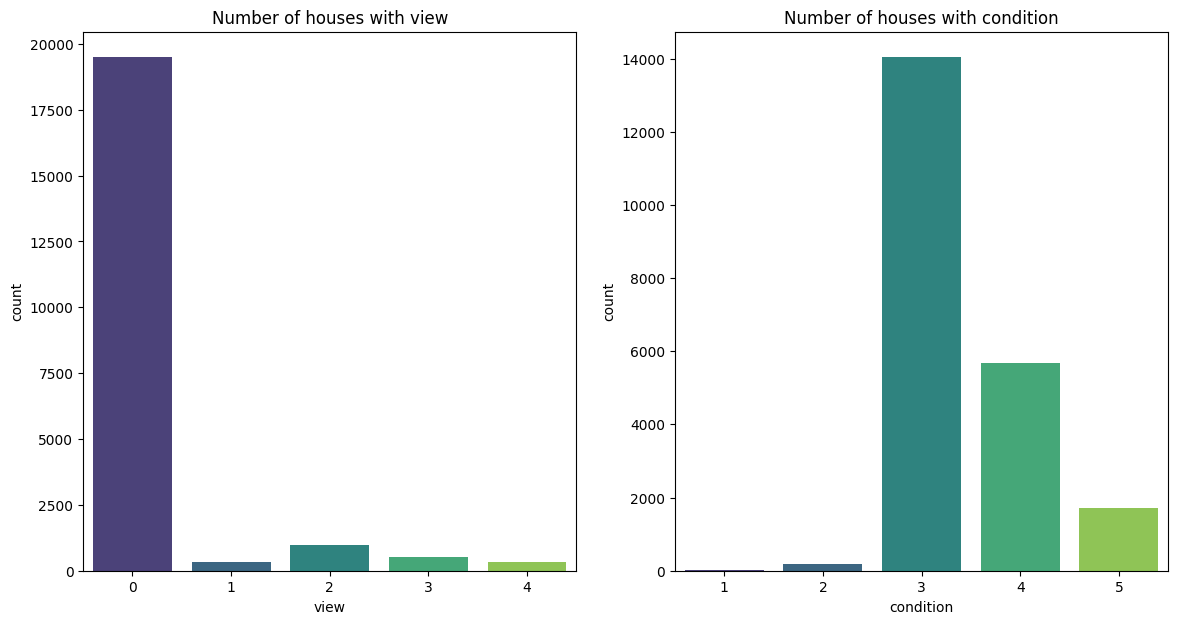

In [21]:
# subplot for view and condition
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
sns.countplot(data=df, x='view', palette='viridis')
plt.title('Number of houses with view')
plt.subplot(1,2,2)
sns.countplot(data=df, x='condition', palette='viridis')
plt.title('Number of houses with condition')

Conclusion: House don't have much good view and condition of the house is better than average.

- View: An index from 0 to 4 of how good the view of the property was.
- Condition: An index from 1 to 5 on the condition of the house.

Text(0.5, 1.0, 'Number of houses with grade')

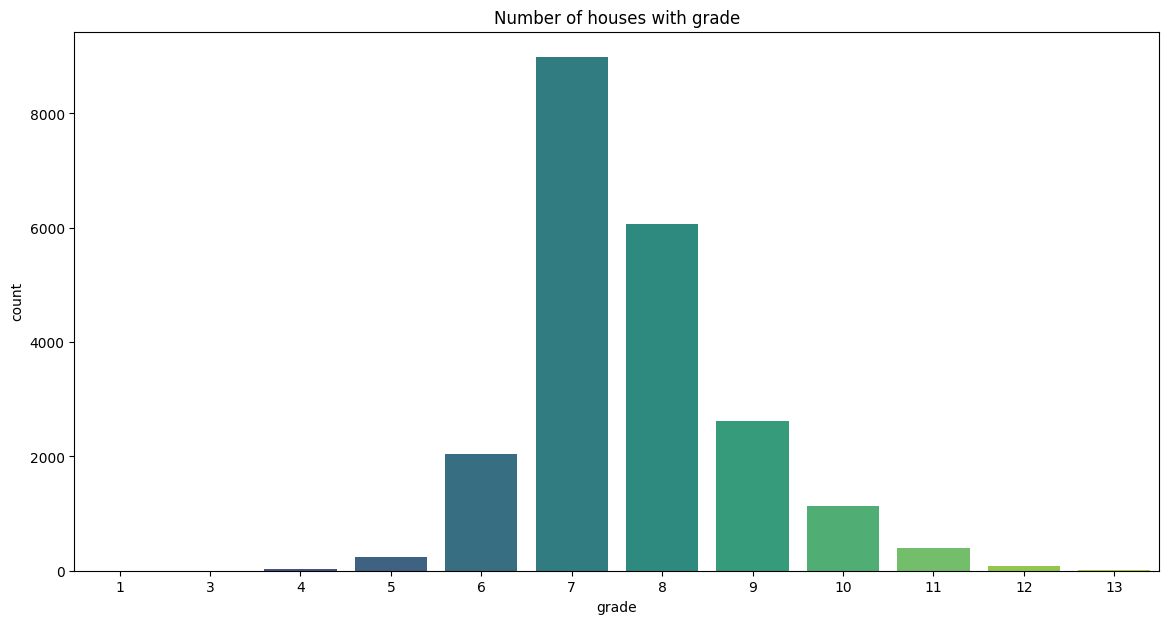

In [22]:
# countplot for the number of houses with grade
plt.figure(figsize=(14,7))
sns.countplot(data=df, x='grade', palette='viridis')
plt.title('Number of houses with grade')

Conclusion: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high-quality level of construction and design.

Text(0.5, 1.0, 'Price of houses over the years houses were built')

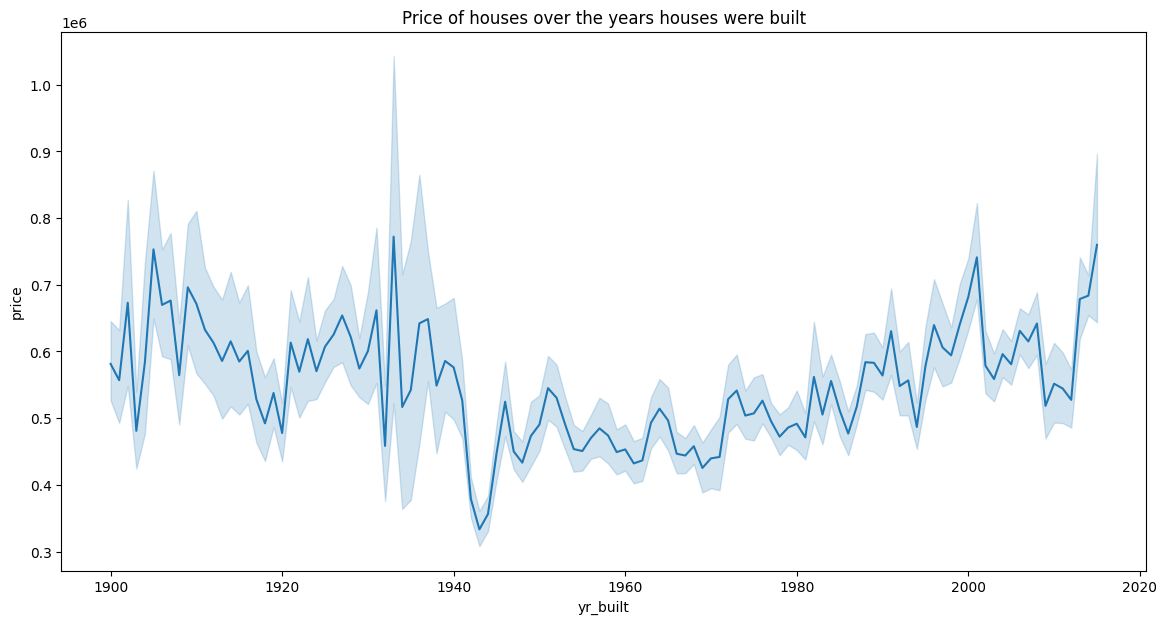

In [23]:
# line plot for year built and price
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='yr_built', y='price')
plt.title('Price of houses over the years houses were built')

Conclusion:

- Prices of the house between 1940 to 1980 is as compare to before 1940 and after 1980. And, prices decreased too much between 1940 to 1945, it might be because of "World War II".
- Prices are started increasing after 1980 in some kind of consistent manner.

Text(0.5, 1.0, 'Price of houses over the years houses were last renovated')

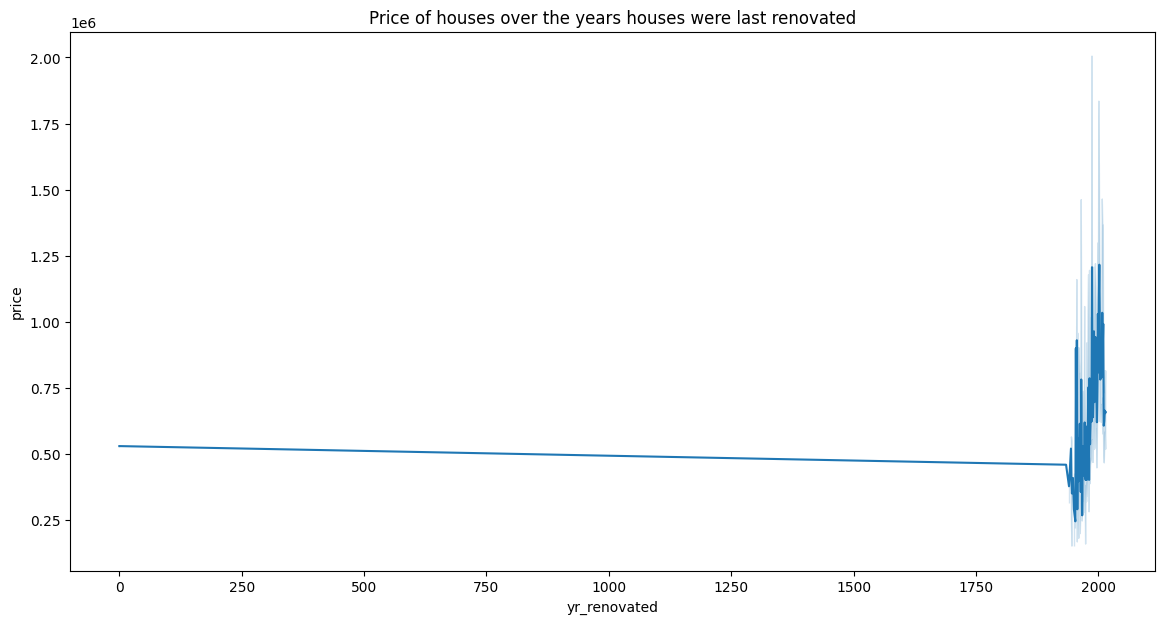

In [24]:
# line plot for year renovated and price
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were last renovated')

This don't help us anymore. Let's take a look between 1900 to 2015 (last year in dataset).

Text(0.5, 1.0, 'Price of houses over the years houses were renovated')

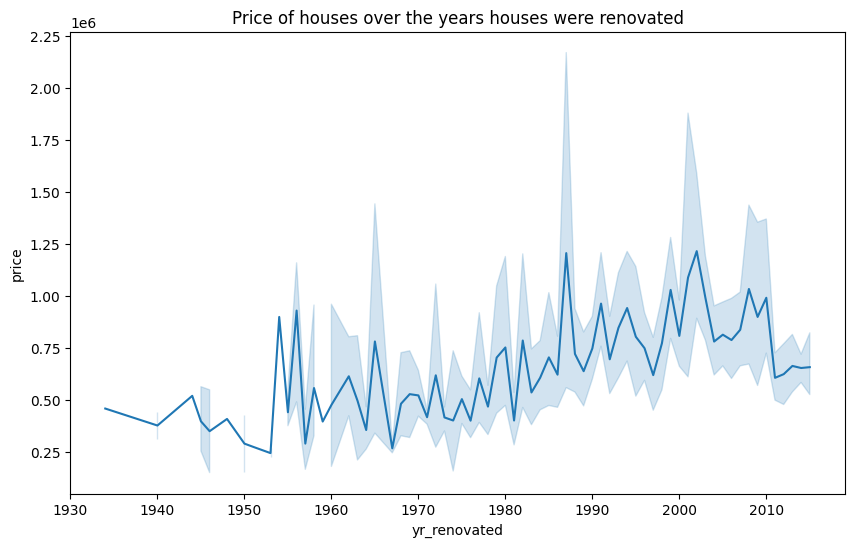

In [25]:
# line plot for year renovated and price between 1900 and 2000
# Assuming df is your DataFrame and it has been imported correctly
filtered_df = df[(df['yr_renovated'] >= 1900) & (df['yr_renovated'] <= 2015)]
plt.figure(figsize=(10,6))
sns.lineplot(data=filtered_df, x='yr_renovated', y='price')
plt.title('Price of houses over the years houses were renovated')

Conclusion: It seems like Prices of the houses which renovated after 1980 has high value.

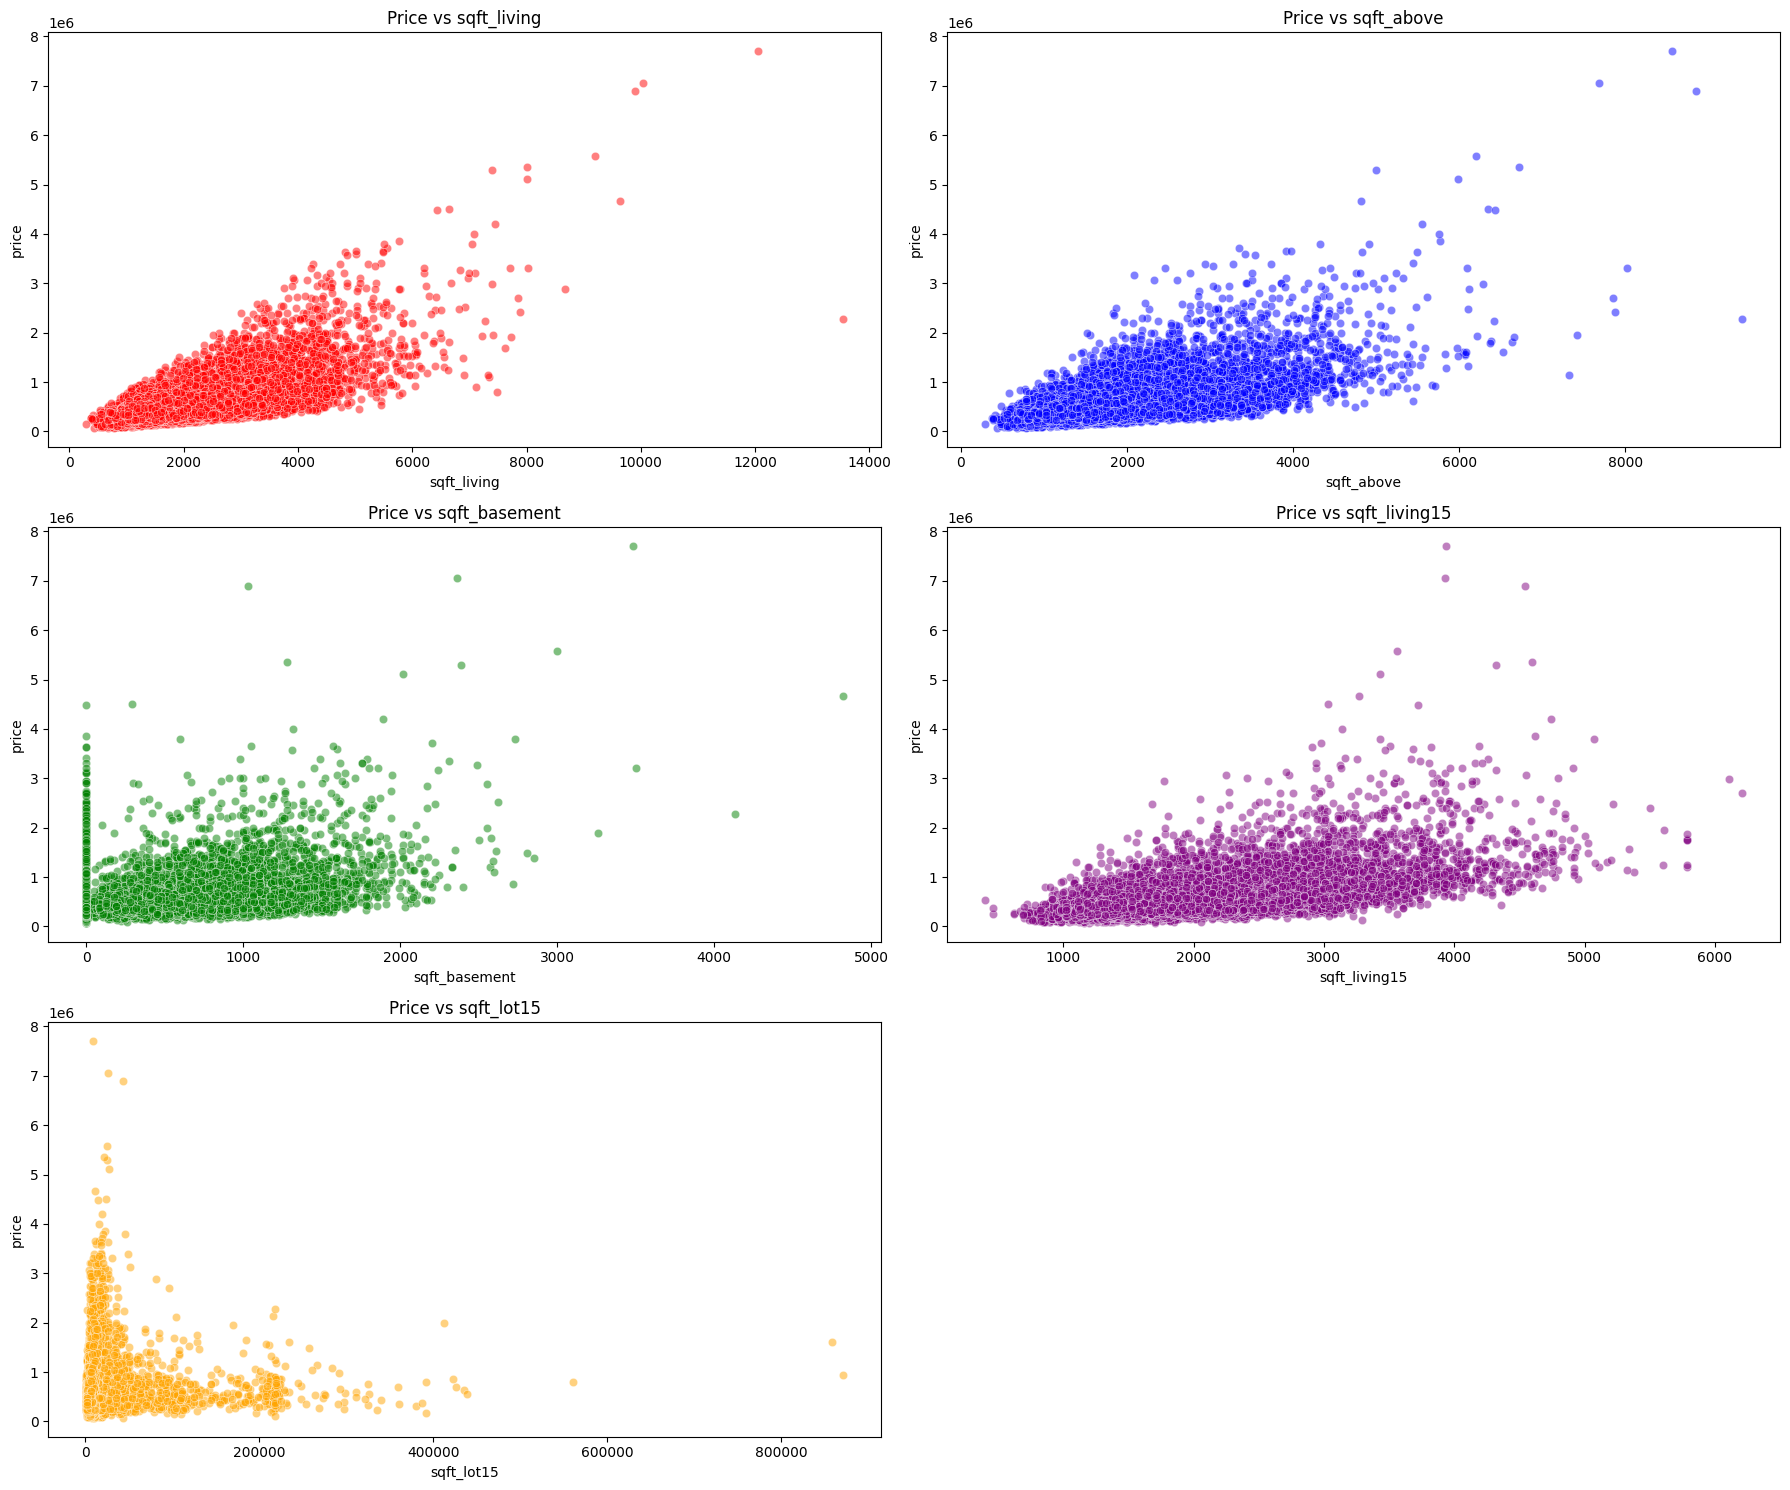

In [26]:
# subplot for scatter plots of price and sqft_living, sqft_above, sqft_basement, sqft_living15, sqft_lot15
plt.figure(figsize=(18,15))
plt.subplot(3,2,1)
sns.scatterplot(data=df, x='sqft_living', y='price', alpha=0.5, color='r')
plt.title('Price vs sqft_living')

plt.subplot(3,2,2)
sns.scatterplot(data=df, x='sqft_above', y='price', alpha=0.5, color='b')
plt.title('Price vs sqft_above')

plt.subplot(3,2,3)
sns.scatterplot(data=df, x='sqft_basement', y='price', alpha=0.5, color='g')
plt.title('Price vs sqft_basement')

plt.subplot(3,2,4)
sns.scatterplot(data=df, x='sqft_living15', y='price', alpha=0.5, color='purple')
plt.title('Price vs sqft_living15')

plt.subplot(3,2,5)
sns.scatterplot(data=df, x='sqft_lot15', y='price', alpha=0.5, color='orange')
plt.title('Price vs sqft_lot15')

plt.tight_layout()

Text(0.5, 1.0, 'Latitude and Longitude (Coordinates) of the houses / Map of King County')

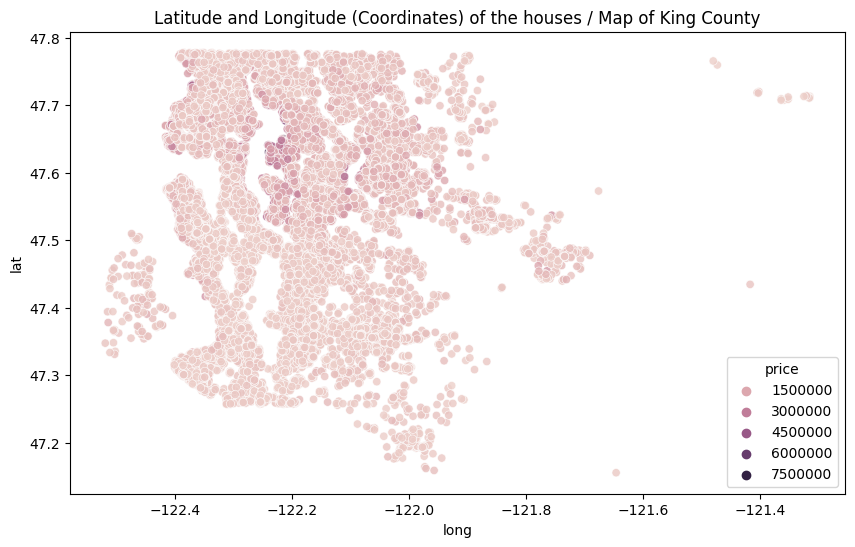

In [27]:
# latitude and longitude of the houses
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='long', y='lat', hue='price',alpha=0.8)
plt.title("Latitude and Longitude (Coordinates) of the houses / Map of King County")

Text(0.5, 1.0, 'Heatmap of the correlation between the features')

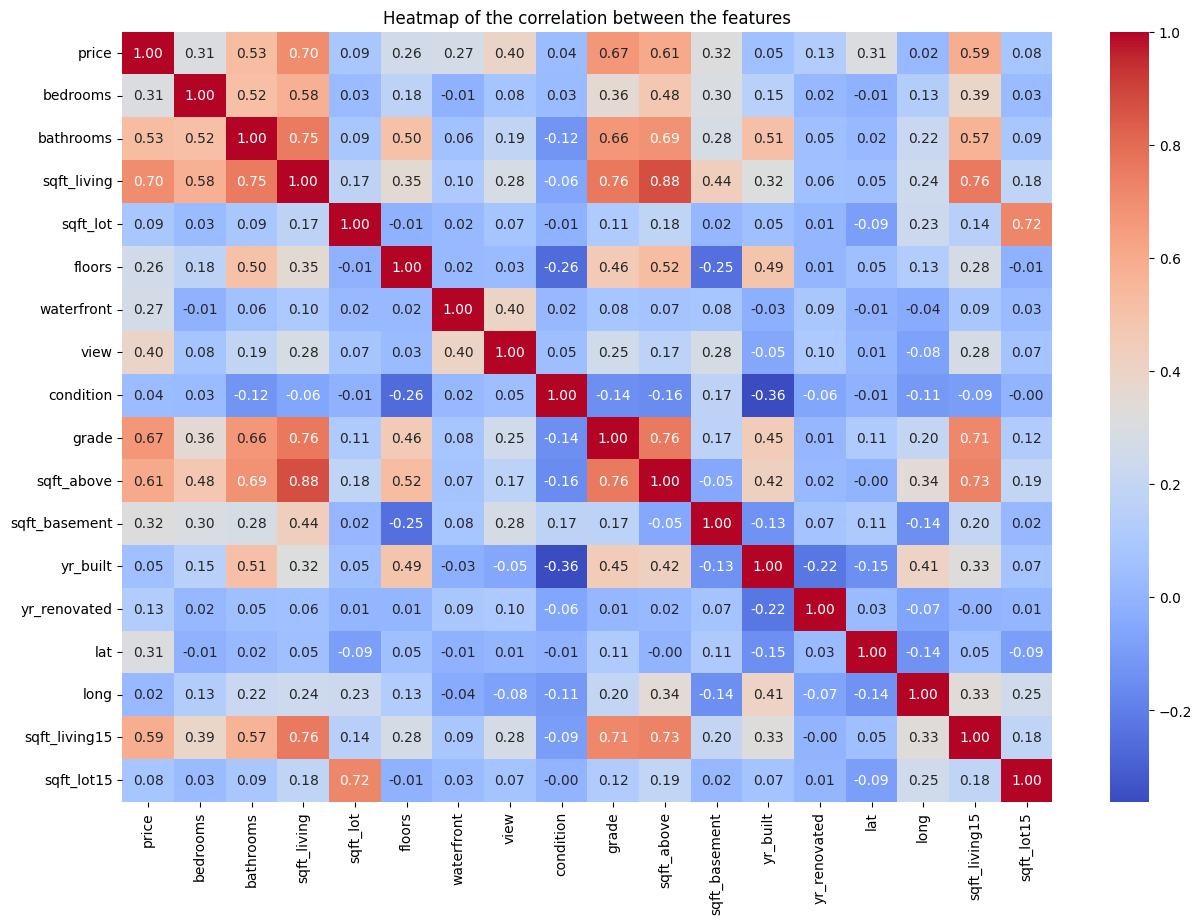

In [28]:
# heatmap of the correlation between the features excluding the id and zipcode column
plt.figure(figsize=(15,10))
sns.heatmap(df.drop(['id', 'zipcode', 'date'], axis=1).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap of the correlation between the features')

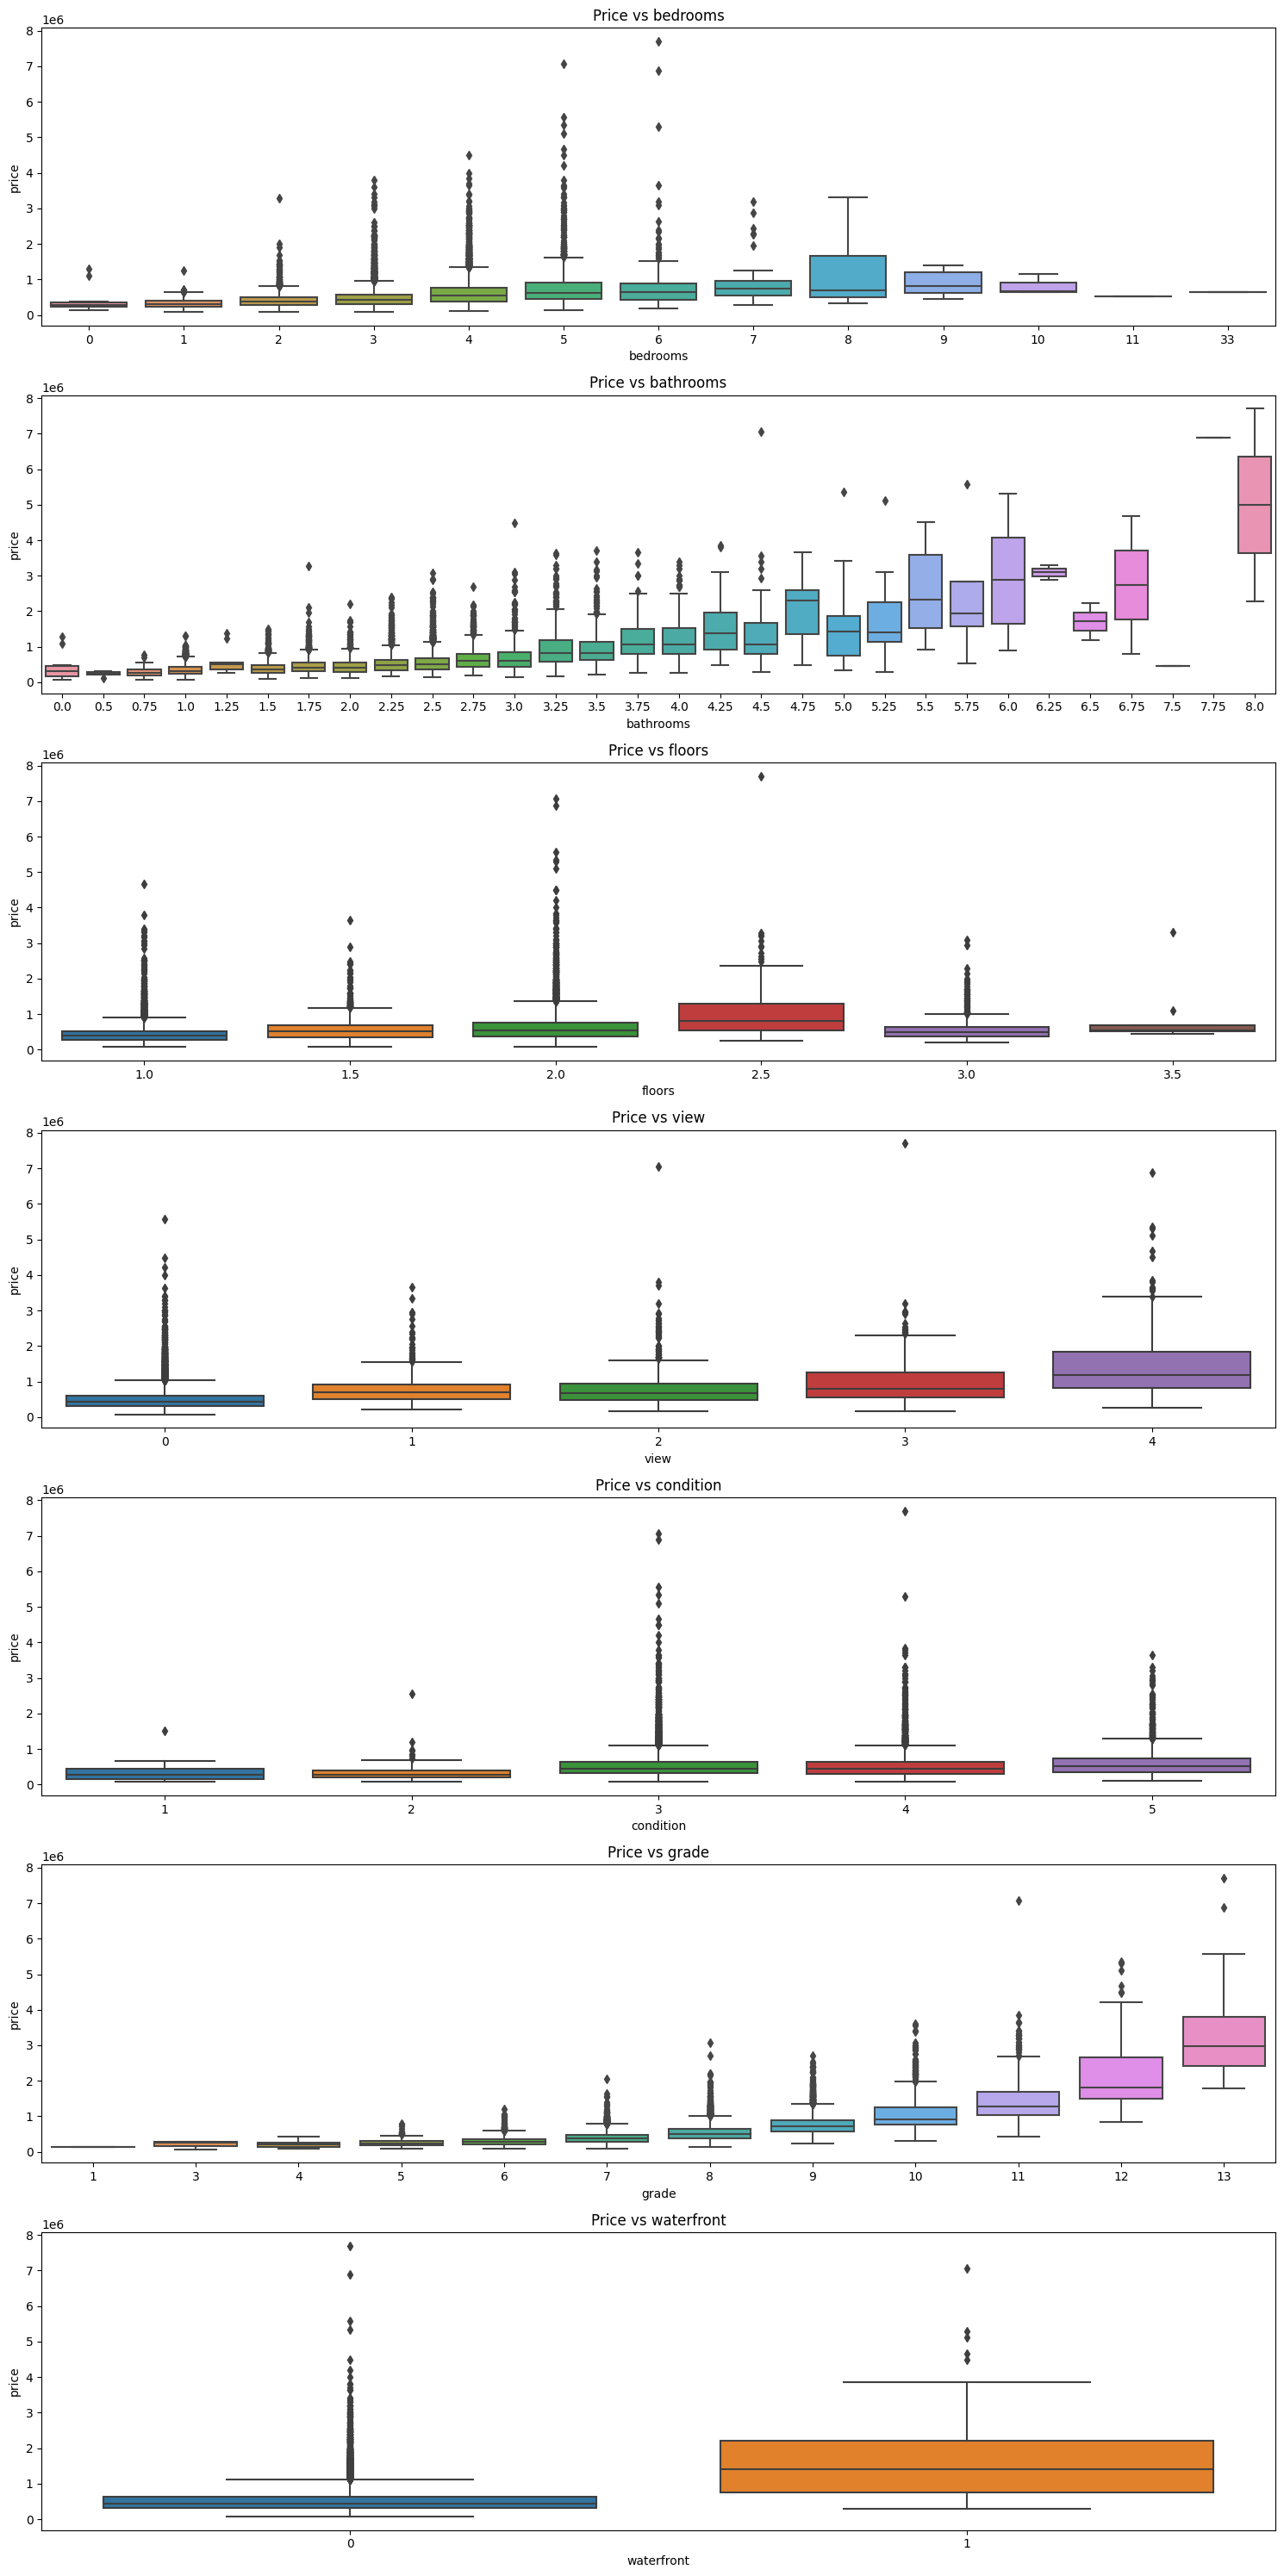

In [29]:
# boxplot for the price and the number of bedrooms, bathrooms, floors, view, condition, grade
plt.figure(figsize=(15,30))
plt.subplot(7,1,1)
sns.boxplot(data=df, x='bedrooms', y='price')
plt.title('Price vs bedrooms')

plt.subplot(7,1,2)
sns.boxplot(data=df, x='bathrooms', y='price')
plt.title('Price vs bathrooms')

plt.subplot(7,1,3)
sns.boxplot(data=df, x='floors', y='price')
plt.title('Price vs floors')

plt.subplot(7,1,4)
sns.boxplot(data=df, x='view', y='price')
plt.title('Price vs view')

plt.subplot(7,1,5)
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price vs condition')

plt.subplot(7,1,6)
sns.boxplot(data=df, x='grade', y='price')
plt.title('Price vs grade')

plt.subplot(7,1,7)
sns.boxplot(data=df, x='waterfront', y='price')
plt.title('Price vs waterfront')


plt.tight_layout()

Text(0.5, 1.0, 'Price vs sqft_living hue by waterfront')

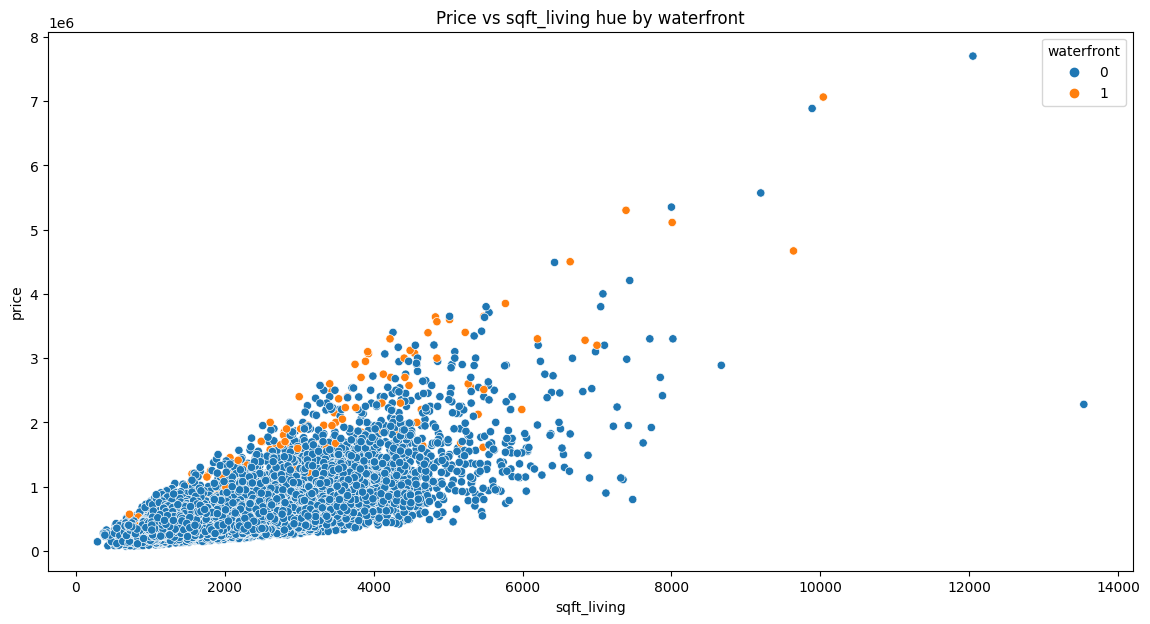

In [30]:
# scatter plot for the price and the sqft_living hue by the waterfront
plt.figure(figsize=(14,7))
sns.scatterplot(data=df, x='sqft_living', y='price', hue='waterfront')
plt.title('Price vs sqft_living hue by waterfront')

## Data Preprocessing

### Remove Irrelevant Features/Columns

In [31]:
# Column id is not useful for our machine learning model. So, we remove it from dataframe
df = df.drop('id', axis=1)

In [32]:
df['zipcode'].value_counts()

zipcode
98103    602
98038    590
98115    583
98052    574
98117    553
        ... 
98102    105
98010    100
98024     81
98148     57
98039     50
Name: count, Length: 70, dtype: int64

Zipcode column have lot's of unique values and in numeric type, it might give wrong information to our model and mislead the prediction. Now, let's check the correlation with target feature.

In [33]:
# Let's check the correlation of 'zipcode' column with target feature
correlation = df['zipcode'].corr(df['price'])
print(f"The correlation between zipcode and price is: {correlation}")

The correlation between zipcode and price is: -0.05320285429832562


Conclusion: Column 'zipcode' don't have good coorelation with target feature 'price'. Remove it from dataframe.

In [34]:
df = df.drop('zipcode', axis=1)

### Feature Engineering

In [35]:
# feature engineer date column, extract year and month for separate new feature
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].apply(lambda date: date.year)
df['month'] = df['date'].apply(lambda date: date.month)

In [36]:
# check the dataframe
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


Text(0.5, 1.0, 'Price of houses over the time')

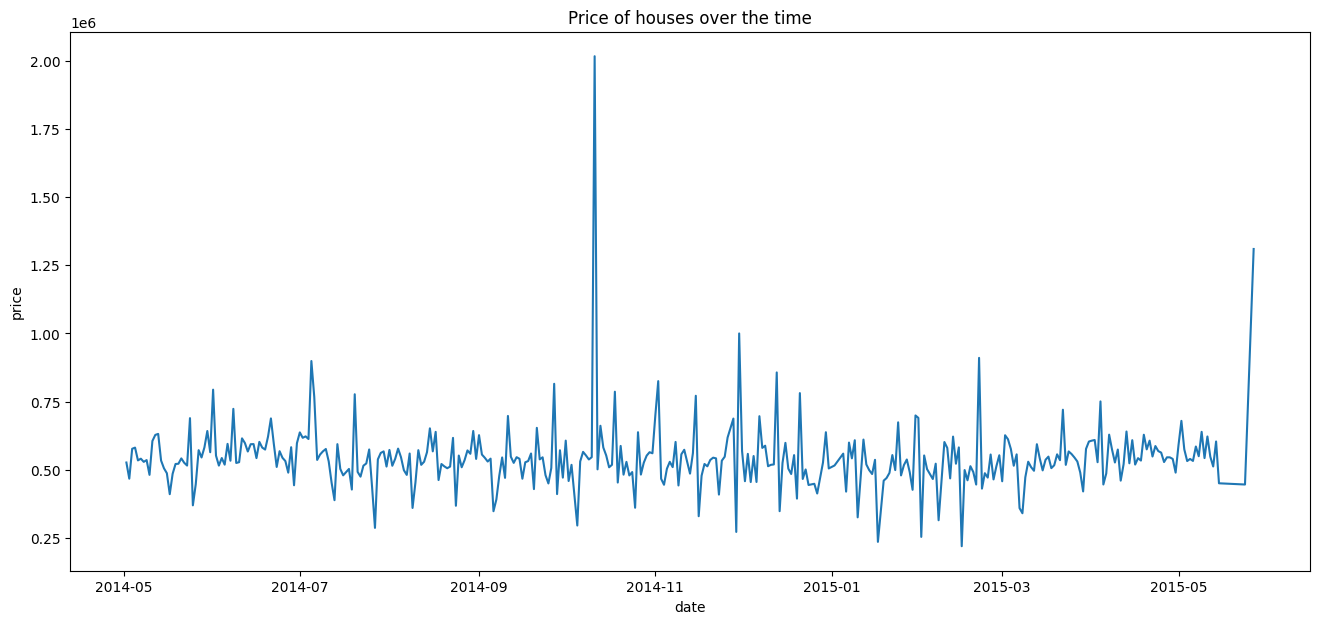

In [37]:
# lineplot for date vs price
plt.figure(figsize=(16,7))
sns.lineplot(data=df, x='date', y='price', ci=None)
plt.title('Price of houses over the time')

Text(0.5, 1.0, 'Price of houses over the years')

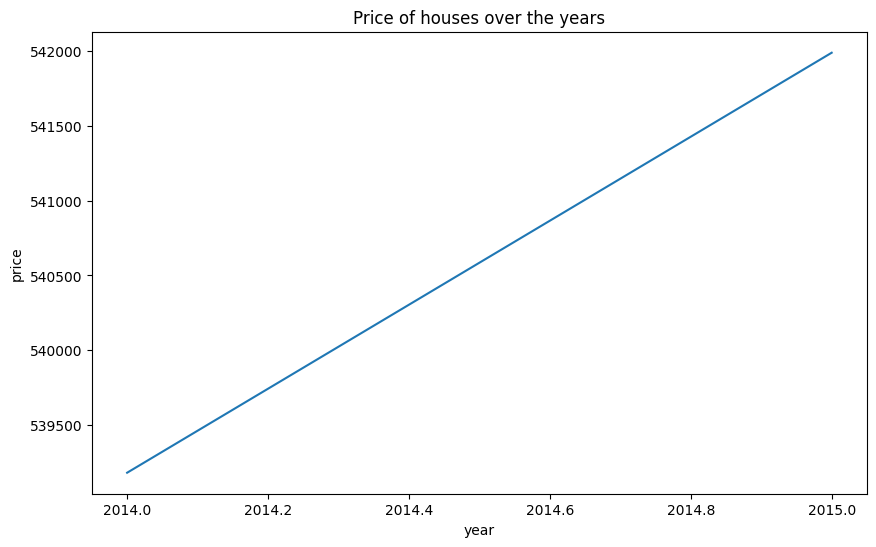

In [38]:
# lineplot for the price and the year
plt.figure(figsize=(10,6))
sns.lineplot(data=df, x='year', y='price', ci=None)
plt.title('Price of houses over the years')

Text(0.5, 1.0, 'Price of houses over the month')

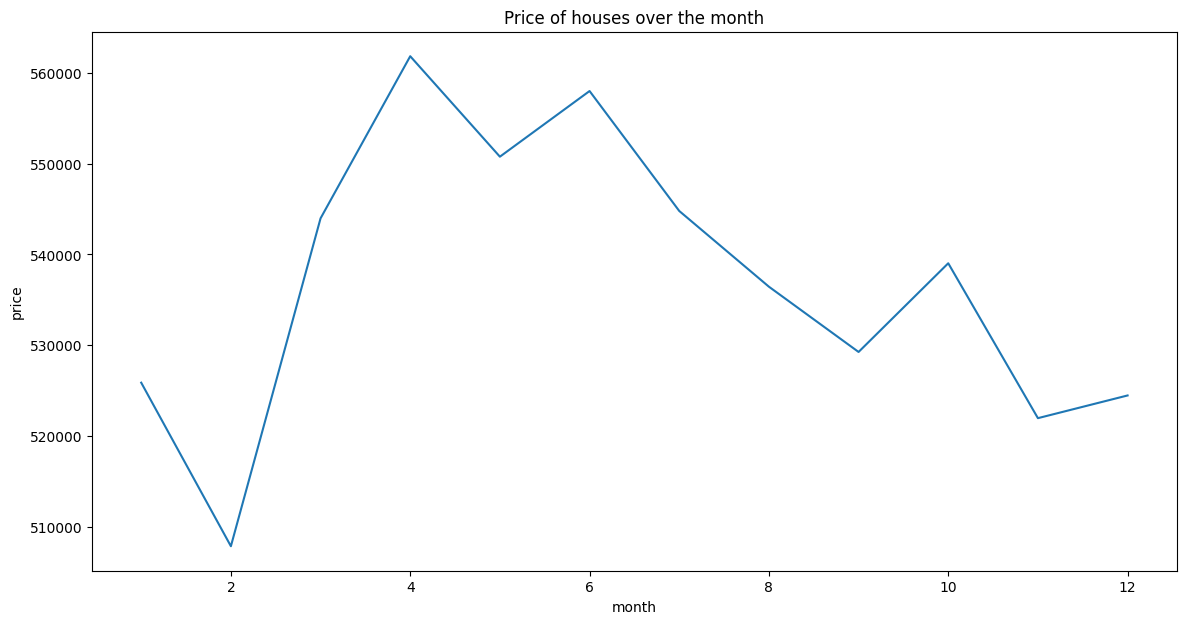

In [39]:
# lineplot for the price and the month
plt.figure(figsize=(14,7))
sns.lineplot(data=df, x='month', y='price', ci=None)
plt.title("Price of houses over the month")

Conclusion: Price is decreased during the period of 2014, from 4th (April) month to 9th (September) month.

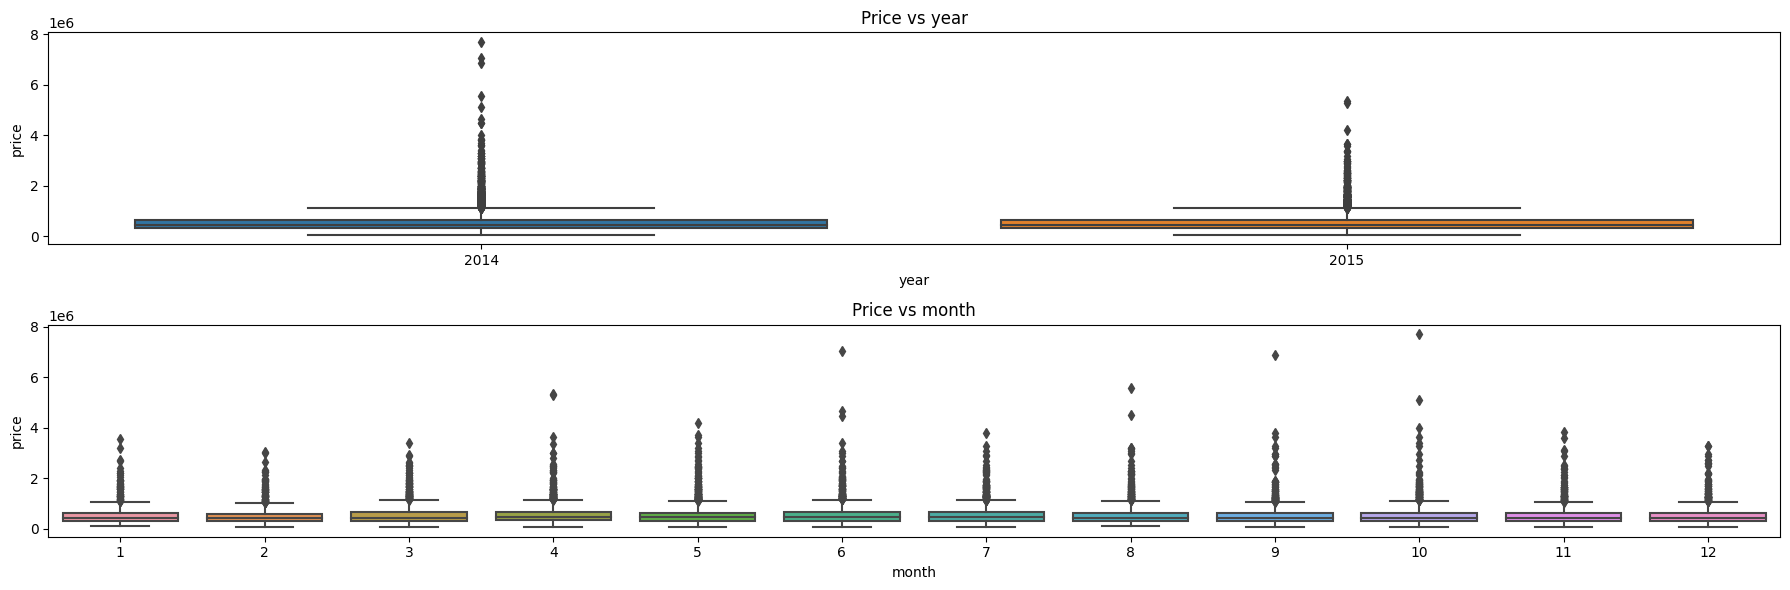

In [40]:
# boxplot for price and year, month
plt.figure(figsize=(18,6))
plt.subplot(2,1,1)
sns.boxplot(data=df, x='year', y='price')
plt.title("Price vs year")

plt.subplot(2,1,2)
sns.boxplot(data=df, x='month', y='price')
plt.title("Price vs month")

plt.tight_layout()

In [41]:
# drop date column
df = df.drop('date', axis=1)

In [42]:
# feature engineering the year column
df['house_age'] = df['year'] - df['yr_built']
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,...,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,...,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,...,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,...,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,...,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28


## Model Training

### Split Dependent and Independent Feature

In [43]:
# Input Variable or Independent Features
X = df.drop('price', axis=1)

# Output Variable or Dependent Feature
y = df['price']

In [44]:
# Take a look on indepented features (without scaling)
X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month,house_age
0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10,59
1,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12,63
2,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2,82
3,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12,49
4,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,47.6993,-122.346,1530,1509,2014,5,5
21609,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,47.5107,-122.362,1830,7200,2015,2,1
21610,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,47.5944,-122.299,1020,2007,2014,6,5
21611,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,47.5345,-122.069,1410,1287,2015,1,11


In [45]:
# Take a look on dependent feature
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

### Separate Train and Test Data

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# shape of all train and test data varibales
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(17290, 20)
(4323, 20)
(17290,)
(4323,)


### Scaling the features

In [47]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Take a look on indepented features (with scaling)
X_train

array([[-0.39526335, -0.47445144, -0.32393262, ..., -0.68884041,
        -0.50783343, -0.41490958],
       [-1.46896378, -1.45258323, -1.18365301, ...,  1.45171507,
        -1.15040653,  1.45352058],
       [-0.39526335, -1.45258323, -1.09547656, ...,  1.45171507,
        -1.47169308,  1.01189163],
       ...,
       [-0.39526335,  0.50368036,  0.05081729, ..., -0.68884041,
         0.77731276, -1.12831019],
       [-2.54266422, -1.77862716, -1.8670205 , ..., -0.68884041,
        -0.18654689,  0.26451957],
       [ 0.67843709,  0.50368036,  1.16404497, ...,  1.45171507,
        -1.15040653, -1.16228164]])

In [48]:
X_test

array([[ 0.67843709,  0.17763643, -0.00429299, ..., -0.68884041,
         1.09859931, -0.51682395],
       [ 1.75213752,  1.15576822,  0.91053768, ..., -0.68884041,
         0.45602621, -0.21108084],
       [ 0.67843709,  0.50368036,  1.86945657, ..., -0.68884041,
         0.45602621, -0.89050998],
       ...,
       [ 0.67843709,  0.50368036,  0.39690986, ..., -0.68884041,
         1.09859931, -1.23022456],
       [ 0.67843709, -0.47445144,  0.19410402, ..., -0.68884041,
         1.7411724 ,  0.12863374],
       [ 0.67843709,  0.50368036,  0.54680982, ..., -0.68884041,
         1.7411724 , -1.26419602]])

## Trainig and Model Selection

### Create an Evaluate Function to give all metrics after model Training

In [49]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(),
    "AdaBoost Regressor": AdaBoostRegressor(),
    "SVR": SVR()
}
model_list = []
r2_list =[]

In [51]:
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate Train and Test dataset
    model_train_mae, model_train_mse, model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae, model_test_mse, model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)


    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for Training set')
    print("- Mean Squared Error: {:.4f}".format(model_train_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('---------------------------------------')

    print('Model performance for Test set')
    print("- Mean Squared Error: {:.4f}".format(model_test_mse))
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)

    print('='*40)
    print('\n')

Linear Regression
Model performance for Training set
- Mean Squared Error: 39629571321.5475
- Root Mean Squared Error: 199071.7743
- Mean Absolute Error: 125072.3709
- R2 Score: 0.6967
---------------------------------------
Model performance for Test set
- Mean Squared Error: 45778142396.4902
- Root Mean Squared Error: 213958.2726
- Mean Absolute Error: 127642.4801
- R2 Score: 0.6972


Lasso
Model performance for Training set
- Mean Squared Error: 39629571376.2804
- Root Mean Squared Error: 199071.7744
- Mean Absolute Error: 125072.5604
- R2 Score: 0.6967
---------------------------------------
Model performance for Test set
- Mean Squared Error: 45778183163.4865
- Root Mean Squared Error: 213958.3678
- Mean Absolute Error: 127642.6476
- R2 Score: 0.6972


Ridge
Model performance for Training set
- Mean Squared Error: 39629571475.0717
- Root Mean Squared Error: 199071.7747
- Mean Absolute Error: 125070.6275
- R2 Score: 0.6967
---------------------------------------
Model performance f

### Result

In [52]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
6,XGBRegressor,0.870063
5,Random Forest Regressor,0.856889
3,K-Neighbors Regressor,0.776483
0,Linear Regression,0.697188
1,Lasso,0.697188
2,Ridge,0.697186
4,Decision Tree,0.693274
7,AdaBoost Regressor,0.192777
8,SVR,-0.063243


### XGBoost Regression

In [53]:
xgbr = XGBRegressor()
xgbr.fit(X_train, y_train)
y_pred = xgbr.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 87.01%


Text(0.5, 1.0, 'XGBoost Regression Plot')

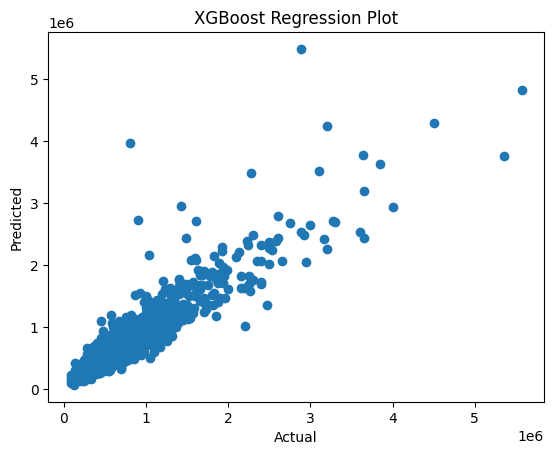

In [54]:
# plot y_test and y_pred
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title("XGBoost Regression Plot")

<Axes: xlabel='price'>

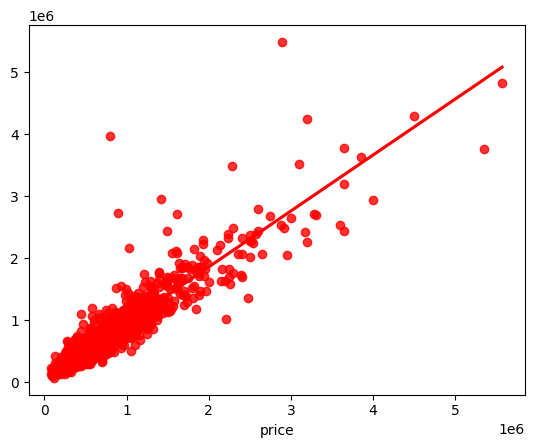

In [55]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red')

### Difference between Actual and Predicted Values

In [56]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
735,365000.0,4.062162e+05,-41216.18750
2830,865000.0,8.662865e+05,-1286.50000
4106,1038000.0,1.093808e+06,-55808.37500
16218,1490000.0,1.702278e+06,-212278.12500
19964,711000.0,7.586874e+05,-47687.37500
...,...,...,...
13674,338000.0,3.468142e+05,-8814.21875
20377,673000.0,7.145984e+05,-41598.37500
8805,285000.0,3.219555e+05,-36955.46875
10168,605000.0,5.898708e+05,15129.18750


## Hyperparameter Tuning on XGBoost Regressor

In [57]:
# XGBRegressor
xgb = XGBRegressor()
xgb_param = {
    'n_estimators': [100, 500, 1000],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.3]
}

xgb_grid = GridSearchCV(xgb, xgb_param, cv=5, n_jobs=-1)
xgb_grid.fit(X_train, y_train)

print(f"Best parameters for XGBRegressor: {xgb_grid.best_params_}")
print(f"Best score for XGBRegressor: {xgb_grid.best_score_}")

Best parameters for XGBRegressor: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 1000}
Best score for XGBRegressor: 0.899768736421102


In [58]:
# Implementing the best parameters for XGBRegressor
xgb = XGBRegressor(n_estimators=1000, max_depth=3, learning_rate=0.1)
xgb.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
# Make predictions
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

In [60]:
# Evaluate Train and Test dataset
xgb_train_mae, xgb_train_mse, xgb_train_rmse, xgb_train_r2 = evaluate_model(y_train, y_train_pred)

xgb_test_mae, xgb_test_mse, xgb_test_rmse, xgb_test_r2 = evaluate_model(y_test, y_test_pred)

In [61]:
print('XGBRegressor')
print('Model performance for Training set')
print("- Mean Squared Error: {:.4f}".format(xgb_train_rmse))
print("- Root Mean Squared Error: {:.4f}".format(xgb_train_rmse))
print("- Mean Absolute Error: {:.4f}".format(xgb_train_mae))
print("- R2 Score: {:.4f}".format(xgb_train_r2))

print('---------------------------------------')

print('Model performance for Test set')
print("- Mean Squared Error: {:.4f}".format(xgb_test_mse))
print("- Root Mean Squared Error: {:.4f}".format(xgb_test_rmse))
print("- Mean Absolute Error: {:.4f}".format(xgb_test_mae))
print("- R2 Score: {:.4f}".format(xgb_test_r2))

XGBRegressor
Model performance for Training set
- Mean Squared Error: 78086.4390
- Root Mean Squared Error: 78086.4390
- Mean Absolute Error: 52687.4423
- R2 Score: 0.9533
---------------------------------------
Model performance for Test set
- Mean Squared Error: 22163284209.4856
- Root Mean Squared Error: 148873.3831
- Mean Absolute Error: 70602.4768
- R2 Score: 0.8534


In [62]:
score = r2_score(y_test, y_test_pred)*100
print(f"Accuracy of the model is {score:.2f}%")

Accuracy of the model is 85.34%


Text(0.5, 1.0, 'Feature Importance')

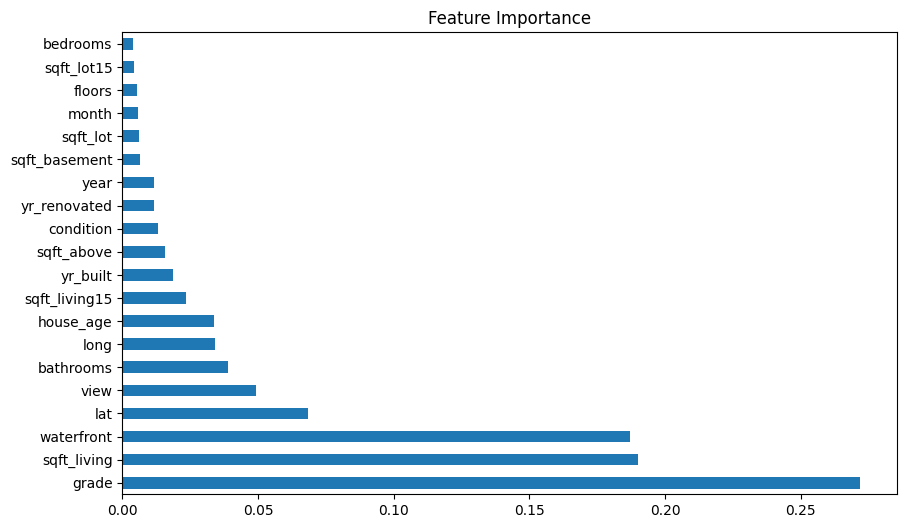

In [63]:
# Feature importance
plt.figure(figsize=(10,6))
feat_importances = pd.Series(xgb.feature_importances_, index=df.drop('price', axis=1).columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.title('Feature Importance')

In [64]:
pred_df_hp =pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_test_pred,'Difference':y_test-y_test_pred})
pred_df_hp

,Actual Value,Predicted Value,Difference
735,365000.0,3.908148e+05,-25814.78125
2830,865000.0,9.157963e+05,-50796.31250
4106,1038000.0,1.096429e+06,-58428.75000
16218,1490000.0,2.225812e+06,-735811.50000
19964,711000.0,7.496503e+05,-38650.31250
...,...,...,...
13674,338000.0,3.224224e+05,15577.59375
20377,673000.0,6.781056e+05,-5105.56250
8805,285000.0,3.155002e+05,-30500.15625
10168,605000.0,5.982980e+05,6702.00000


## Conclusion

XGBoost model is the best model which give better accuracy (87.01%) without Hyperparamter Tuning.

## Testing Model

In [65]:
# testing the model on new data
new_data = df.drop('price', axis=1).iloc[0].values.reshape(1, -1)
new_data

array([[ 3.00000e+00,  1.00000e+00,  1.18000e+03,  5.65000e+03,
         1.00000e+00,  0.00000e+00,  0.00000e+00,  3.00000e+00,
         7.00000e+00,  1.18000e+03,  0.00000e+00,  1.95500e+03,
         0.00000e+00,  4.75112e+01, -1.22257e+02,  1.34000e+03,
         5.65000e+03,  2.01400e+03,  1.00000e+01,  5.90000e+01]])

In [66]:
# scaling the new data
new_data = scaler.transform(new_data)
new_data

array([[-0.39526335, -1.45258323, -0.985256  , -0.23556614, -0.91959976,
        -0.08499166, -0.30591651, -0.62542567, -0.55868959, -0.73753689,
        -0.65631017, -0.54725545, -0.20829394, -0.35491059, -0.30507313,
        -0.94376477, -0.25704623, -0.68884041,  1.09859931,  0.53629123]])

In [67]:
# Predicting the price of the house
price = xgb.predict(new_data)
print(f"The price of the house is: {price[0]:.2f}")

The price of the house is: 203712.47


In [68]:
# Actual price of the house
actual_price = df['price'].iloc[0]
print(f"The actual price of the house is: {actual_price:.2f}")

# Difference between actual and predicted price
difference = actual_price - price[0]
print(f"The difference between actual and predicted price is: {difference:.2f}")

The actual price of the house is: 221900.00
The difference between actual and predicted price is: 18187.53
